In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Read an image

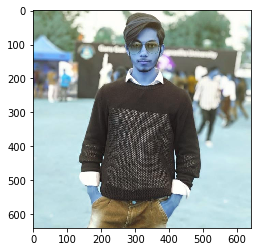

In [77]:
img = cv2.imread("rehan.jpg")
#cv2.imshow("image",img)
plt.imshow(img) #bgr

(640, 640, 3)


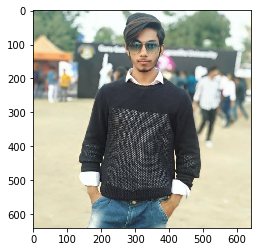

In [78]:
#bgr to rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.show()

### Flatten the image

In [290]:
all_pixels = img.reshape((-1,3))
print(all_pixels.shape)

(409600, 3)


### K-MEANS

In [291]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)

In [292]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [293]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [294]:
centers = km.cluster_centers_
print(centers.shape)
print(centers) 

(2, 3)
[[ 77.35374792  86.73179776  85.85551973]
 [223.72342783 220.12819162 197.56328559]]


#### To convert into int

In [295]:
centers = np.array(centers,dtype ='uint8')
print(centers)

[[ 77  86  85]
 [223 220 197]]


## PLot the colors of centers

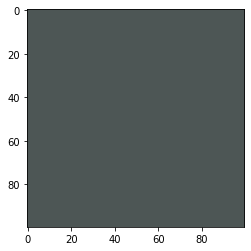

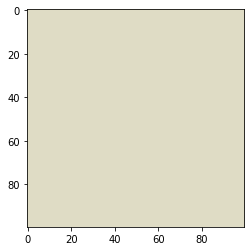

In [296]:
color_img = np.zeros((100,100,3),dtype = 'uint8')
for color in centers:
    #color_img = np.zeros((100,100,3),dtype = 'uint8')
    color_img[:,:,:] = color
    plt.imshow(color_img)
    plt.show()

## segmenting an original image

In [297]:
new_img = np.zeros((640*640,3),dtype = 'uint8')
print(new_img.shape)

(409600, 3)


In [298]:
for i in range(new_img.shape[0]):
    new_img[i] = centers[km.labels_[i]]
print(new_img.shape)
new_img = new_img.reshape((640,640,3))
print(new_img.shape)

(409600, 3)
(640, 640, 3)


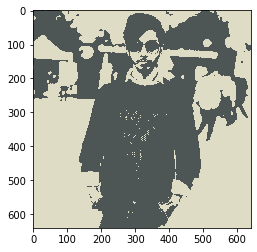

In [299]:
plt.imshow(new_img)


In [300]:
new_img.shape

(640, 640, 3)

In [301]:
edited_img = new_img.reshape((-1,3))
#print(edited_img.shape[0])
for i in range (edited_img.shape[0]):
    if np.equal(edited_img[i],centers[1,:]).all() == bool(1):
        edited_img[i] = np.array([0,0,0])
        #print(edited_img[i])
#print(edited_img.shape)
   # print(centers[1].shape)
    #break

In [288]:
for i in range (edited_img.shape[0]):
    if np.equal(edited_img[i],centers[2,:]).all() == bool(1):
        edited_img[i] = np.array([100,100,100])

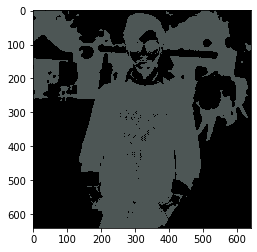

In [302]:
edited_img = edited_img.reshape((640,640,3))
plt.imshow(edited_img)
#plt.imshow(new_img)
plt.show()

In [144]:
centers[1,:]

array([67, 76, 80], dtype=uint8)

In [216]:
edited_img

409600

In [202]:
edited_img = new_img.reshape((-1,3))
#for i in edited_img:
print(np.equal(edited_img[1],centers[5,:]).all() )
if (np.equal(edited_img[1],centers[5,:]).all() == bool(1)):
    print("aaa")

False


In [181]:
np.equal(edited_img[1],centers[5,:])

array([False, False, False])

In [183]:
print(edited_img[1])

[129 144 127]


In [184]:
print(centers[5,:])

[177 183 171]


In [256]:
type(edited_img)

numpy.ndarray